<h1 align='center'><bold>Customer Personality</bold></h1>

## **Import Library**

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colors
from sklearn.cluster import KMeans

# **Import and Reviewing Dataset**

## **Import Dataset**

In [207]:
df = pd.read_csv('marketing_campaign.csv', sep='\\t')

/var/folders/gy/qt4ftq0d1r797666c43jmxj80000gn/T/ipykernel_26299/3877907971.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('marketing_campaign.csv', sep='\\t')


In [208]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## **Checking Data Types each Column**

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [210]:
print("Total row:", df.shape[0])
print("Total column:", df.shape[1])

Total row: 2240
Total column: 29


## **Statical Insight from the Dataset**

In [211]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# **Exploratory Data Analysis**

## **Who is your customers?**

/var/folders/gy/qt4ftq0d1r797666c43jmxj80000gn/T/ipykernel_26299/2762432075.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


[]

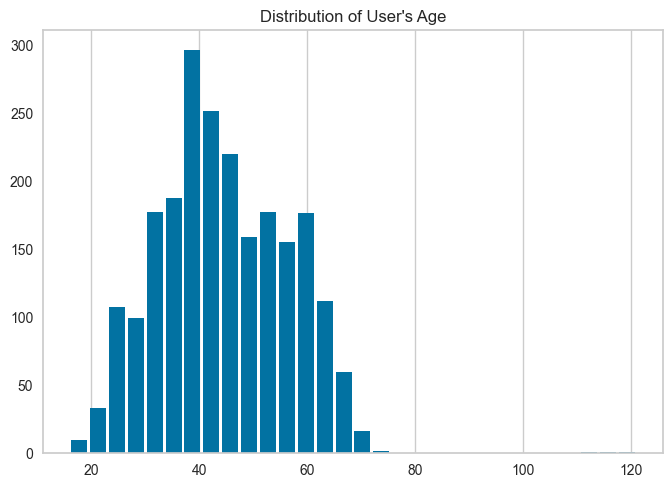

In [212]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
plt.hist(df['Age'], bins=30, rwidth=0.85)
plt.title("Distribution of User's Age")
plt.grid(axis='y')
plt.plot()

Text(0.5, 1.0, "Distribution of User's Education")

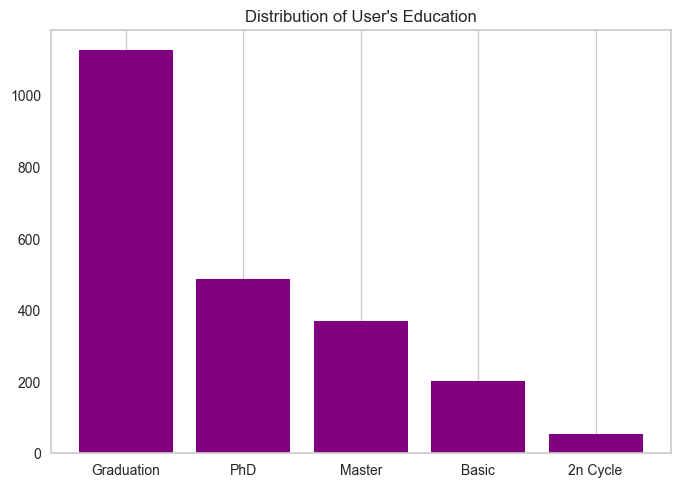

In [213]:
plt.bar(df['Education'].unique(), df['Education'].value_counts().to_list(), color = 'purple')
plt.grid(axis='y')
plt.title("Distribution of User's Education")

[]

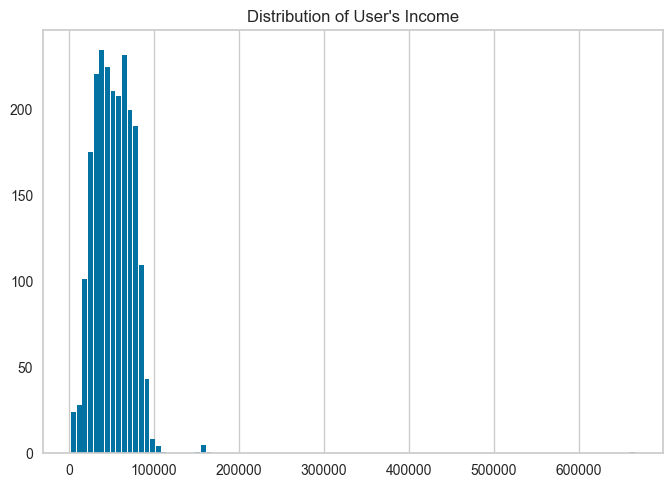

In [214]:
plt.hist(df['Income'], bins=100, rwidth=0.85)
plt.grid(axis='y')
plt.title("Distribution of User's Income")
plt.plot()

Text(0.5, 1.0, "Distribution of User's Marital Status")

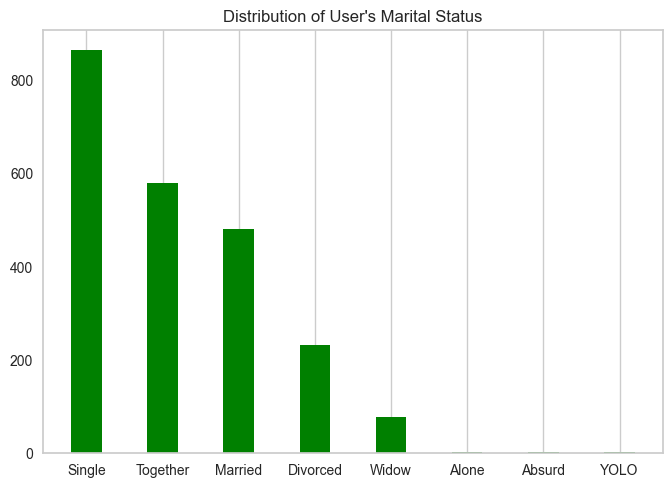

In [215]:
plt.bar(df['Marital_Status'].unique(), df['Marital_Status'].value_counts().to_list(), color = 'green', width = 0.4)
plt.grid(axis='y')
plt.title("Distribution of User's Marital Status")

[]

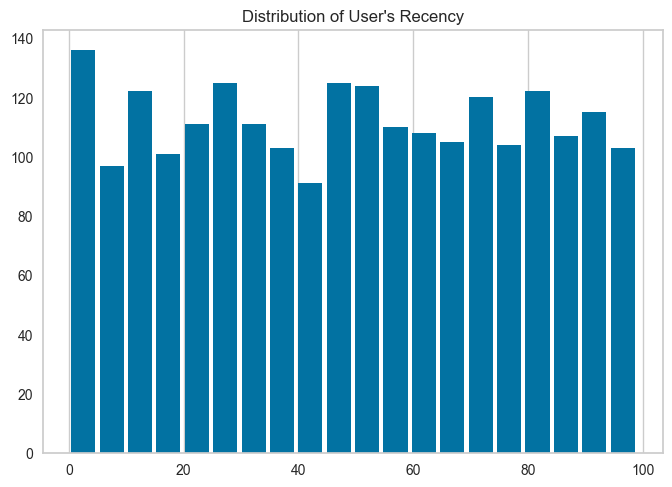

In [216]:
plt.hist(df['Recency'], bins=20, rwidth=0.85)
plt.grid(axis='y')
plt.title("Distribution of User's Recency")
plt.plot()

Text(0.5, 1.0, "Distribution of User's Complain")

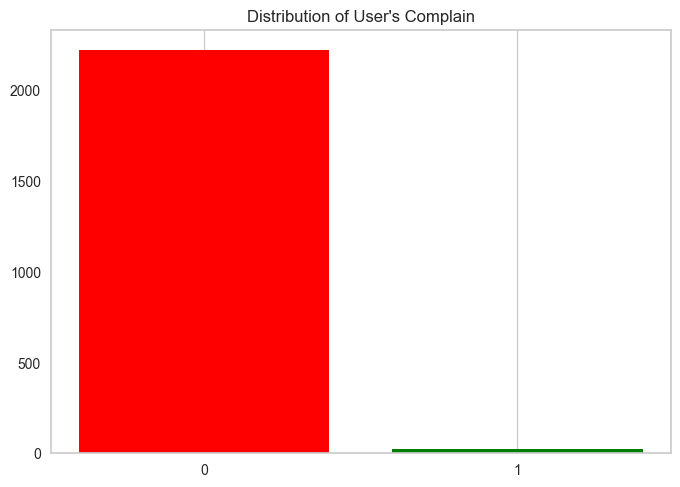

In [217]:
plt.bar([str(x) for x in df['Complain'].value_counts().index.to_list()], df['Complain'].value_counts().to_list(), color = ['red', 'green'])
plt.grid(axis='y')
plt.title("Distribution of User's Complain")

## **Which Product did They Bought?**

### Investigating through age

In [218]:
group_of_people_list = []
for index, row in df.iterrows():
    if row['Age'] >= 61:
        group_of_people_list.append('Old')
    elif row['Age'] >= 46:
        group_of_people_list.append('Middle Age')
    elif row['Age'] >= 20:
        group_of_people_list.append('Adults')
    else:
        group_of_people_list.append('Adolescents')

df['Group of People'] = group_of_people_list
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Group of People
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,3,11,1,55,Middle Age
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,3,11,0,60,Middle Age
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,48,Middle Age
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,3,11,0,30,Adults
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,33,Adults


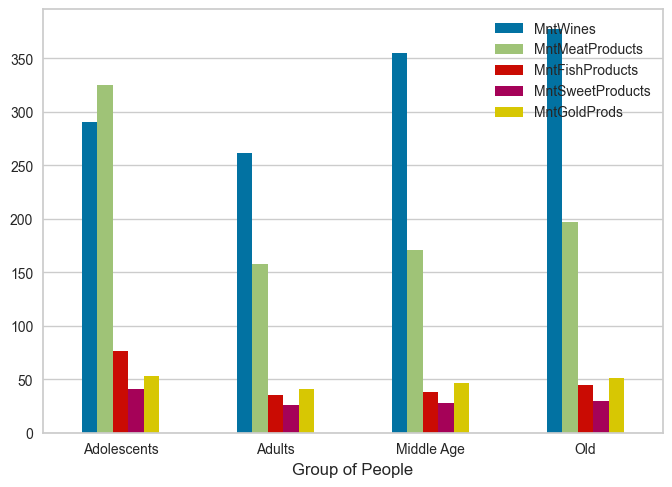

In [219]:
customer_age_product = df.groupby('Group of People')[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
customer_age_product.plot(kind='bar')
plt.xticks(rotation = 0)
plt.grid(axis='x')

### Investingating through marital status

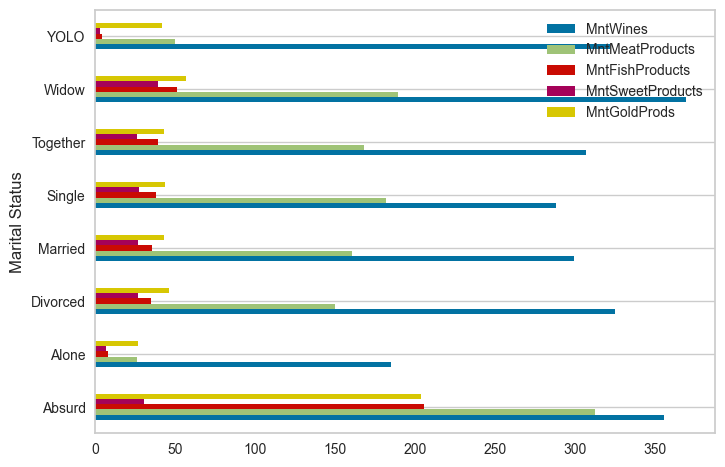

In [220]:
customer_age_product = df.groupby('Marital_Status')[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
customer_age_product.plot(kind='barh')
plt.ylabel("Marital Status")
plt.grid(axis='x')

### Investingating through income

In [221]:
df = df[df['Income'] < 600000]

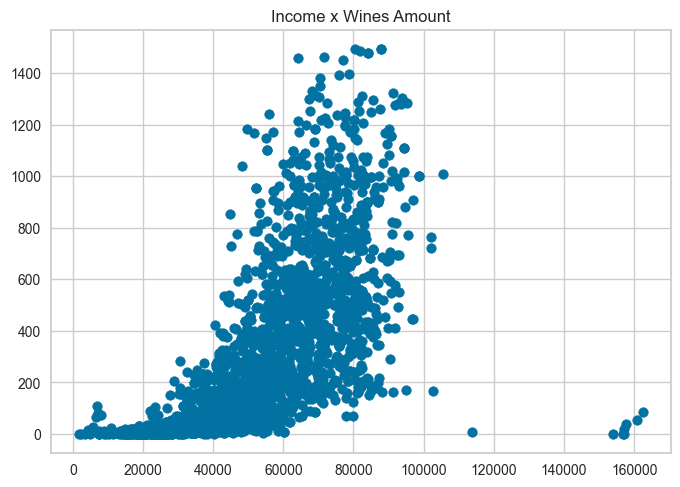

In [222]:
plt.scatter(df['Income'], df['MntWines'])
plt.title('Income x Wines Amount')
plt.show()

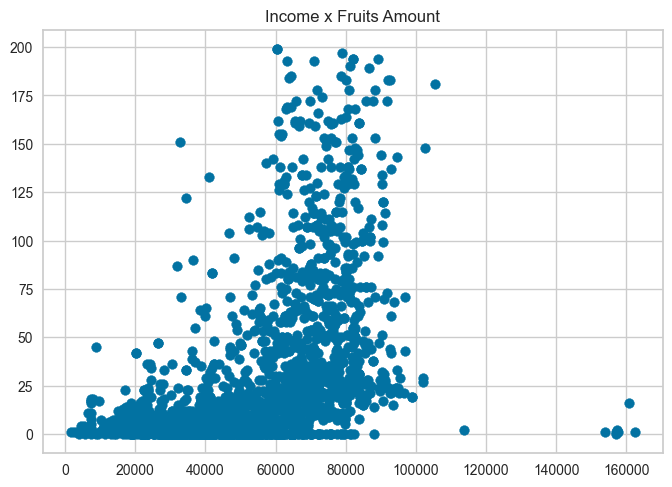

In [223]:
plt.scatter(df['Income'], df['MntFruits'])
plt.title('Income x Fruits Amount')
plt.show()

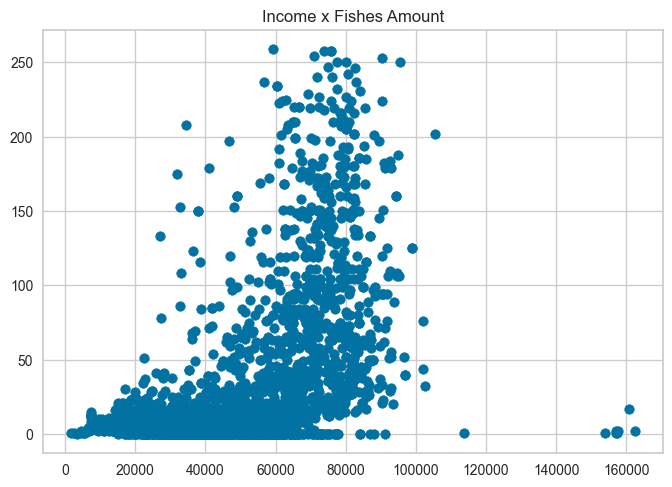

In [224]:
plt.scatter(df['Income'], df['MntFishProducts'])
plt.title('Income x Fishes Amount')
plt.show()

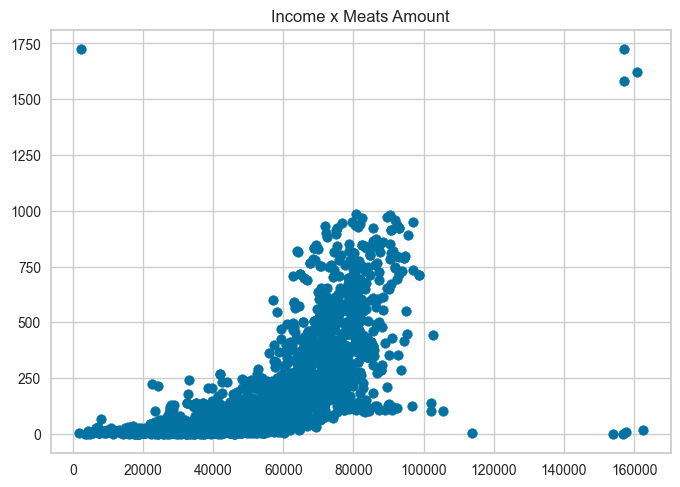

In [225]:
plt.scatter(df['Income'], df['MntMeatProducts'])
plt.title('Income x Meats Amount')
plt.show()

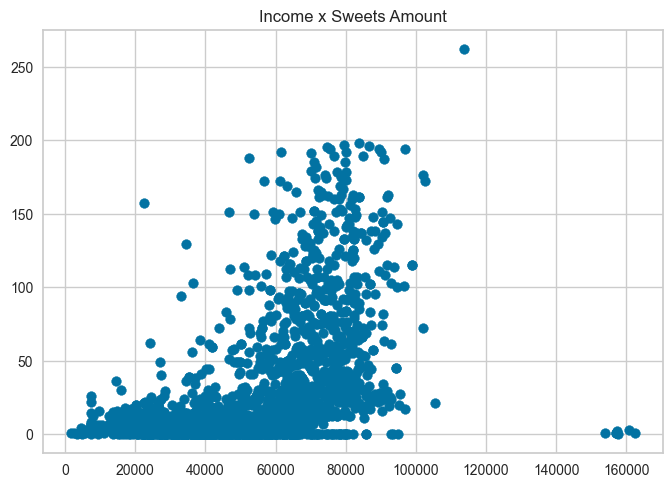

In [226]:
plt.scatter(df['Income'], df['MntSweetProducts'])
plt.title('Income x Sweets Amount')
plt.show()

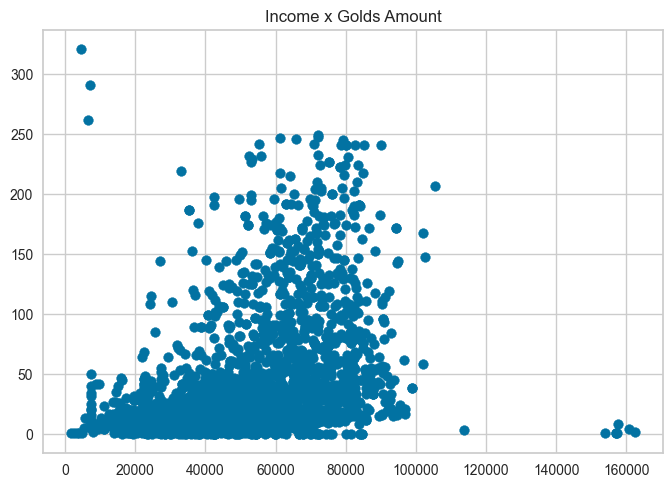

In [227]:
plt.scatter(df['Income'], df['MntGoldProds'])
plt.title('Income x Golds Amount')
plt.show()

### Investingating through children

In [228]:
df['Kidhome'].describe()

count    2215.000000
mean        0.441535
std         0.536886
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64

In [229]:
customer_kidhome_product = df.groupby('Kidhome')[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

Text(0.5, 1.0, 'Product x Kidhome')

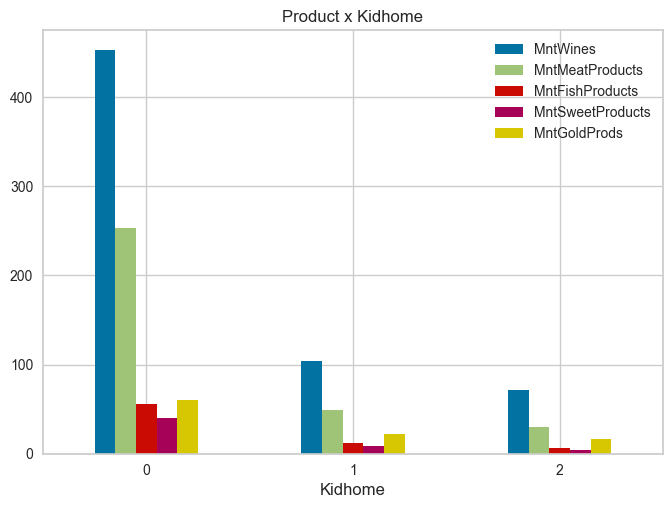

In [230]:
customer_kidhome_product.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Product x Kidhome')

Text(0.5, 1.0, 'Product x Teenhome')

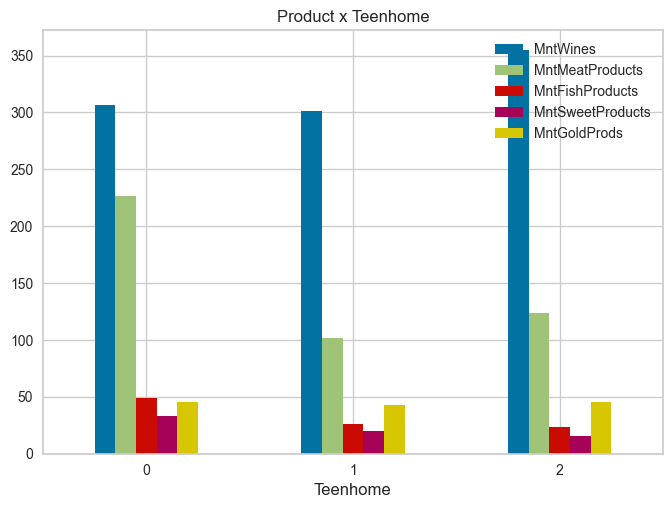

In [231]:
customer_teenhome_product = df.groupby('Teenhome')[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
customer_teenhome_product.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Product x Teenhome')

## **What is the most effective strategies for each campaign?**

<BarContainer object of 5 artists>

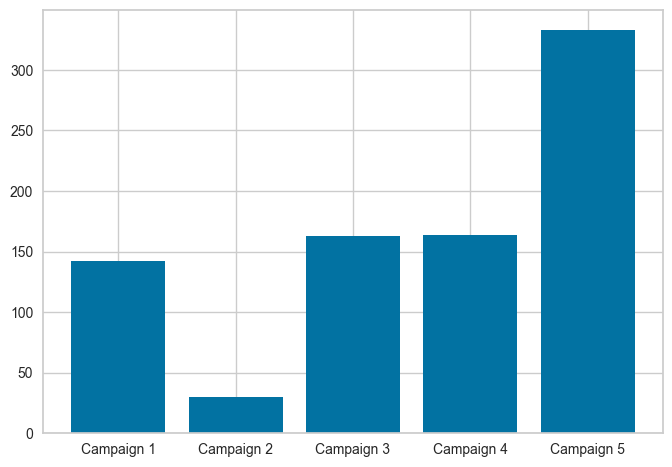

In [232]:
sum_campaign1 = df['AcceptedCmp1'].sum()
sum_campaign2 = df['AcceptedCmp2'].sum()
sum_campaign3 = df['AcceptedCmp3'].sum()
sum_campaign4 = df['AcceptedCmp4'].sum()
sum_campaign5 = df['Response'].sum()

plt.bar(['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5'], [sum_campaign1, sum_campaign2, sum_campaign3, sum_campaign4, sum_campaign5])

### How can the fifth campaign become the most hooked? Let's see what kind of people who hooked with it

In [233]:
def campaign_sum(x, y, z):
    unique_data = df[x].unique()
    list_of_hooked = []
    list_of_unhooked = []
    
    for cam, t in zip(y, z):
    
        for val in unique_data:
            hooked = df[(df[x] == val) & (df[cam] == 1)][cam].count()
            unhooked = df[(df[x] == val) & (df[cam] == 0)][cam].count()

            list_of_hooked.append(hooked)
            list_of_unhooked.append(unhooked)

        X_axis = np.arange(len(unique_data))    
        plt.bar(X_axis - 0.2, list_of_hooked, 0.4, label = 'Hooked')
        plt.bar(X_axis + 0.2, list_of_unhooked, 0.4, label = 'Unhooked')
        plt.xticks(X_axis, unique_data)
        plt.legend()
        plt.title(t)
        plt.show()
        
        list_of_hooked = []
        list_of_unhooked = []

### Observing through Education

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2n Cycle'),
  Text(1, 0, 'Basic'),
  Text(2, 0, 'Graduation'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'PhD')])

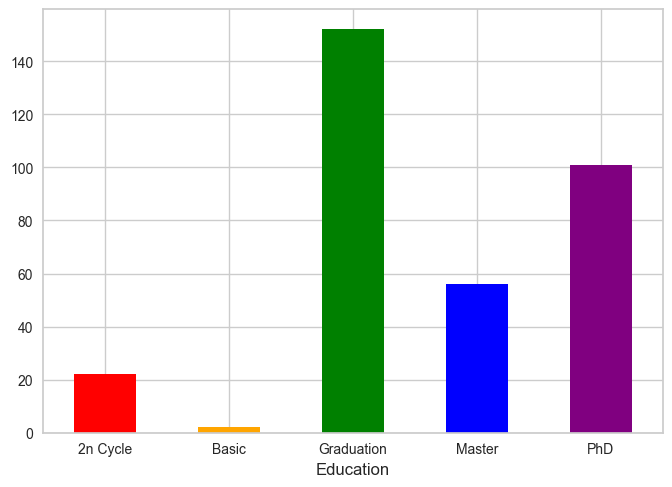

In [234]:
df_education_campaign5 = df.groupby('Education')['Response'].sum()
df_education_campaign5.plot(kind='bar', color=['red', 'orange', 'green', 'blue', 'purple'])
plt.xticks(rotation = 0)

### Observing through age

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Adolescents'),
  Text(1, 0, 'Adults'),
  Text(2, 0, 'Middle Age'),
  Text(3, 0, 'Old')])

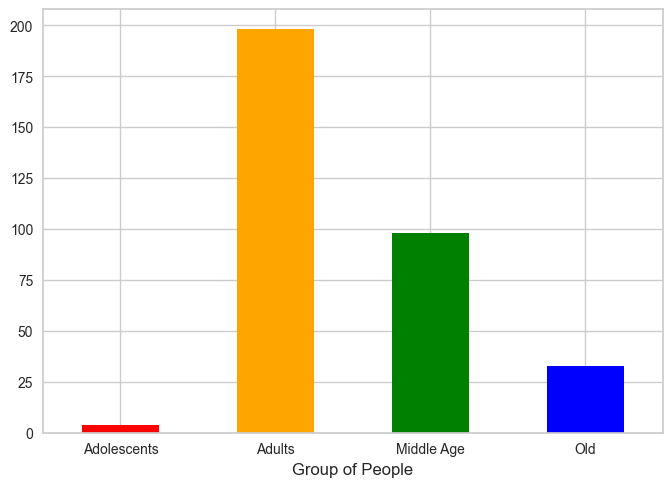

In [235]:
df_age_campaign5 = df.groupby('Group of People')['Response'].sum()
df_age_campaign5.plot(kind='bar', color=['red', 'orange', 'green', 'blue'])
plt.xticks(rotation = 0)

### **Finding  people who complain are less buying or not for each product**

In [236]:
customer_complain = df.groupby('Complain')[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
customer_complain 

,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Complain,,,,,
0,672525,367683,82856,59527,96838
1,3549,2362,541,368,577


### **Finding the correlation between education and campaign**

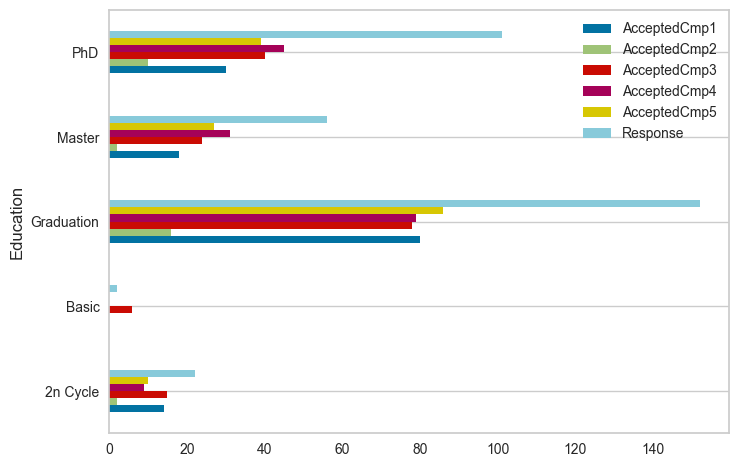

In [237]:
customer_education_campaign = df.groupby('Education')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()
customer_education_campaign.plot(kind='barh')
plt.grid(axis='x')

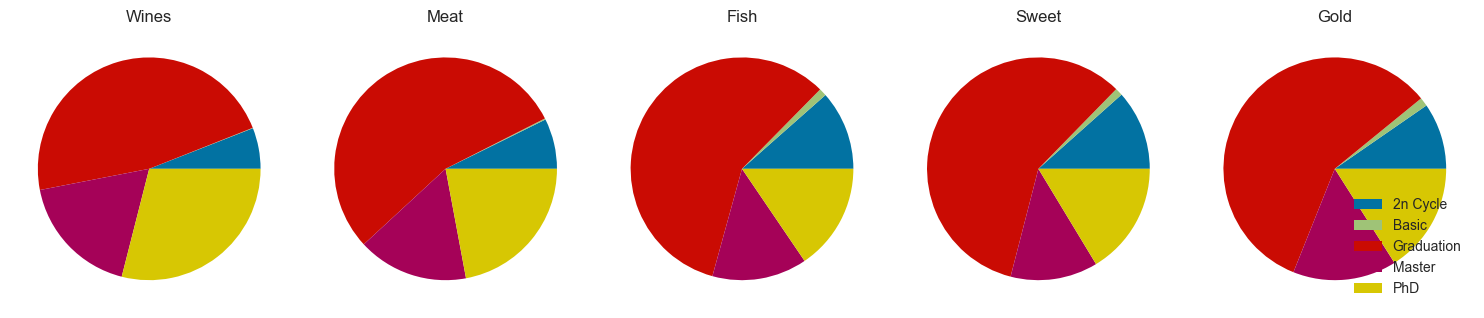

In [238]:
customer_education_purchase = df.groupby('Education')[['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

fig, ax = plt.subplots(1, 5, figsize=(15,7), tight_layout = True)

ax[0].pie(customer_education_purchase.loc[:, 'MntWines'])
ax[0].set_title("Wines")

ax[1].pie(customer_education_purchase.loc[:, 'MntMeatProducts'])
ax[1].set_title("Meat")

ax[2].pie(customer_education_purchase.loc[:, 'MntFishProducts'])
ax[2].set_title("Fish")

ax[3].pie(customer_education_purchase.loc[:, 'MntSweetProducts'])
ax[3].set_title("Sweet")

ax[4].pie(customer_education_purchase.loc[:, 'MntGoldProds'])
ax[4].set_title("Gold")

plt.legend(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], loc=4)


### **Finding the correlation between customer's age and the number of purchase made with discount**

Text(0.5, 1.0, 'Averange from the number of deals purchase based on Age')

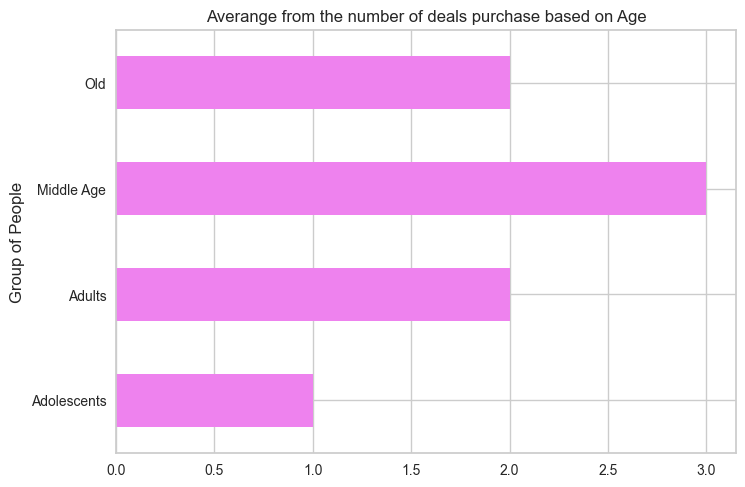

In [239]:
customer_age_deals = np.round(df.groupby('Group of People')['NumDealsPurchases'].mean())
customer_age_deals.plot(kind='barh', color='violet')
plt.title('Averange from the number of deals purchase based on Age')

# **Data Preprocessing**

### **Feature Engineering**

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2215 non-null   int64         
 1   Year_Birth           2215 non-null   int64         
 2   Education            2215 non-null   object        
 3   Marital_Status       2215 non-null   object        
 4   Income               2215 non-null   float64       
 5   Kidhome              2215 non-null   int64         
 6   Teenhome             2215 non-null   int64         
 7   Dt_Customer          2215 non-null   datetime64[ns]
 8   Recency              2215 non-null   int64         
 9   MntWines             2215 non-null   int64         
 10  MntFruits            2215 non-null   int64         
 11  MntMeatProducts      2215 non-null   int64         
 12  MntFishProducts      2215 non-null   int64         
 13  MntSweetProducts     2215 non-nul

In [241]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

subscribe_list = []
recent_customer = df['Dt_Customer'].max()
for index, row in df.iterrows():
    subscribe = recent_customer - row['Dt_Customer']
    subscribe_list.append(subscribe.days)
df['Subscribe'] = subscribe_list

df['Marital_Status'] = df['Marital_Status'].replace('YOLO', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Absurd', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Widow', 'Divorced')
df['Marital_Status'] = df['Marital_Status'].replace('Together', 'Married')

df['Campaing_Acc'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + df['Marital_Status'].replace({'Single': 1, 'Divorced': 1, 'Married': 2})
df['Purchase'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Is_Parent'] = np.where(df.Children > 1, 1, 0)

In [242]:
df.drop(columns=['Kidhome', 'Teenhome', 'Dt_Customer', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'ID'], inplace=True)

### **Remove the Outliers**

Removing outliers in Income feature

<Axes: >

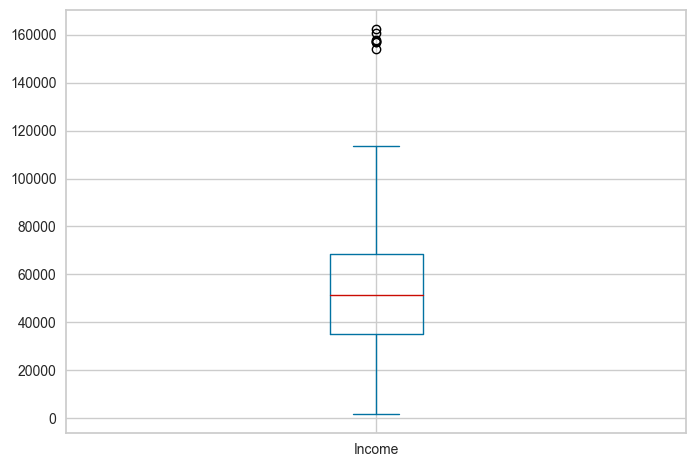

In [243]:
df['Income'].plot(kind='box', grid=True)

In [244]:
df = df[df['Income'] <= 150000]

Removing outliers in Age feature

<Axes: >

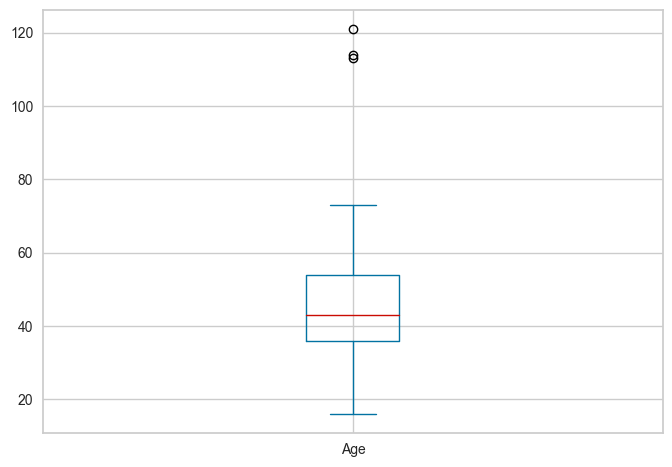

In [245]:
df['Age'].plot(kind='box', grid=True)

In [246]:
df = df[df['Age'] < 80]

Removing outliers in Amount Meat Products feature

<Axes: >

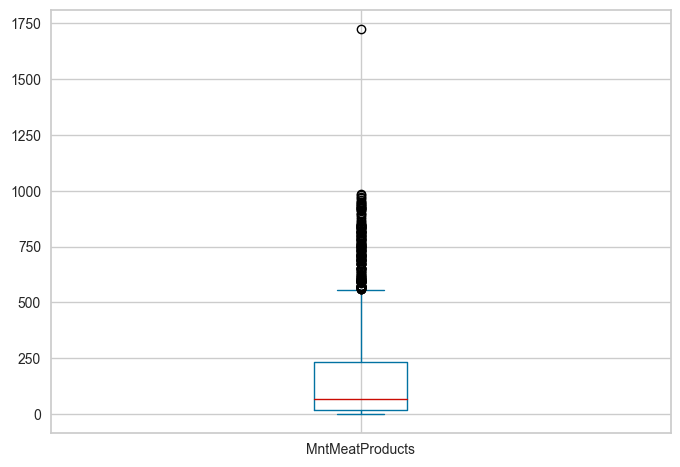

In [247]:
df['MntMeatProducts'].plot(kind='box', grid=True)

In [248]:
df = df[df['MntMeatProducts'] < 1500]

Removing outliers in Amount Sweet Products feature

<Axes: >

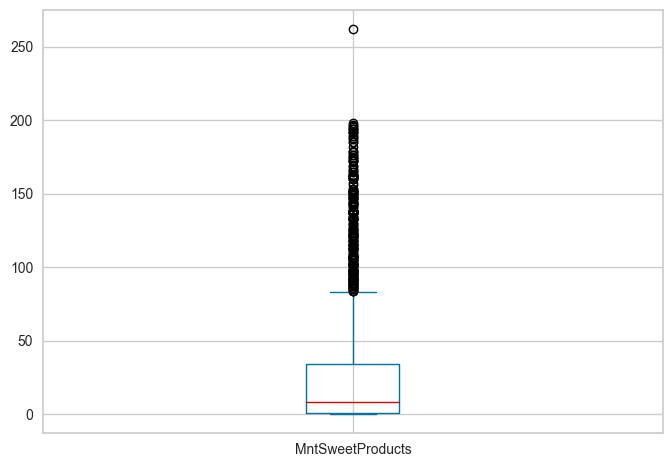

In [249]:
df['MntSweetProducts'].plot(kind='box', grid=True)

In [250]:
df = df[df['MntSweetProducts'] < 225]

Removing outliers in Number of Web Purchase feature

<Axes: >

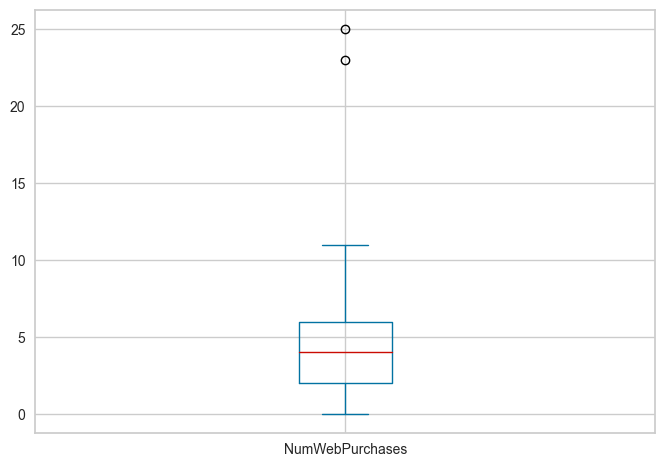

In [251]:
df['NumWebPurchases'].plot(kind='box', grid=True)

In [252]:
df = df[df['NumWebPurchases'] < 20]

### Handling Categorical Variable

In [253]:
education_level = []
for index, row in df.iterrows():
    if row['Education'] == 'Basic':
        education_level.append(1)
    elif row['Education'] == 'Graduation':
        education_level.append(2)
    elif row['Education'] == 'Master' or row['Education'] == '2n Cycle':
        education_level.append(3)
    elif row['Education'] == 'PhD':
        education_level.append(4)
df['Education_Level'] = education_level
df.drop(columns=['Education'], inplace=True)

In [254]:
marital_status = []
df['Marital_Status'] = df['Marital_Status'].replace('YOLO', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Absurd', 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Widow', 'Divorced')

le_marital = LabelEncoder()
df['Marital_Status'] = le_marital.fit_transform(df['Marital_Status'])
df.drop(columns='Group of People', inplace=True)

### Feature Scaling

In [255]:
df.describe()

,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Complain,Response,Age,Children,Subscribe,Campaing_Acc,Family_Size,Purchase,Is_Parent,Education_Level
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.00000,2201.000000,2201.000000,2201.000000,...,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1.076783,51657.867333,49.033167,306.673785,26.446161,164.806906,37.82099,27.055429,43.857338,2.315766,...,0.009087,0.151295,44.115402,0.948660,512.160836,0.451159,2.593821,606.660609,0.210813,2.661517
std,0.590848,20616.629144,28.912050,337.586029,39.807799,215.359506,54.85348,40.851812,51.159284,1.866395,...,0.094912,0.358417,11.738799,0.749302,232.634519,0.894681,0.906260,601.667675,0.407979,0.839055
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000
25%,1.000000,35246.000000,24.000000,24.000000,2.000000,16.000000,3.00000,1.000000,9.000000,1.000000,...,0.000000,0.000000,36.000000,0.000000,340.000000,0.000000,2.000000,69.000000,0.000000,2.000000
50%,1.000000,51315.000000,49.000000,179.000000,8.000000,68.000000,12.00000,8.000000,25.000000,2.000000,...,0.000000,0.000000,43.000000,1.000000,513.000000,0.000000,3.000000,397.000000,0.000000,2.000000
75%,1.000000,68281.000000,74.000000,507.000000,33.000000,232.000000,50.00000,34.000000,56.000000,3.000000,...,0.000000,0.000000,54.000000,1.000000,686.000000,1.000000,3.000000,1047.000000,0.000000,3.000000
max,2.000000,105471.000000,99.000000,1493.000000,199.000000,984.000000,259.00000,198.000000,262.000000,15.000000,...,1.000000,1.000000,73.000000,3.000000,1063.000000,5.000000,5.000000,2525.000000,1.000000,4.000000


In [256]:
df_copy = df.copy()

df_copy.drop(columns= ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], inplace=True)

In [257]:
scaler = MinMaxScaler()
df_copy_scale = scaler.fit_transform(df_copy)
df_copy = pd.DataFrame(df_copy_scale, columns=df_copy.columns) 

# Dimension Reduction

### Checking Correlation between Each Feature

<Axes: >

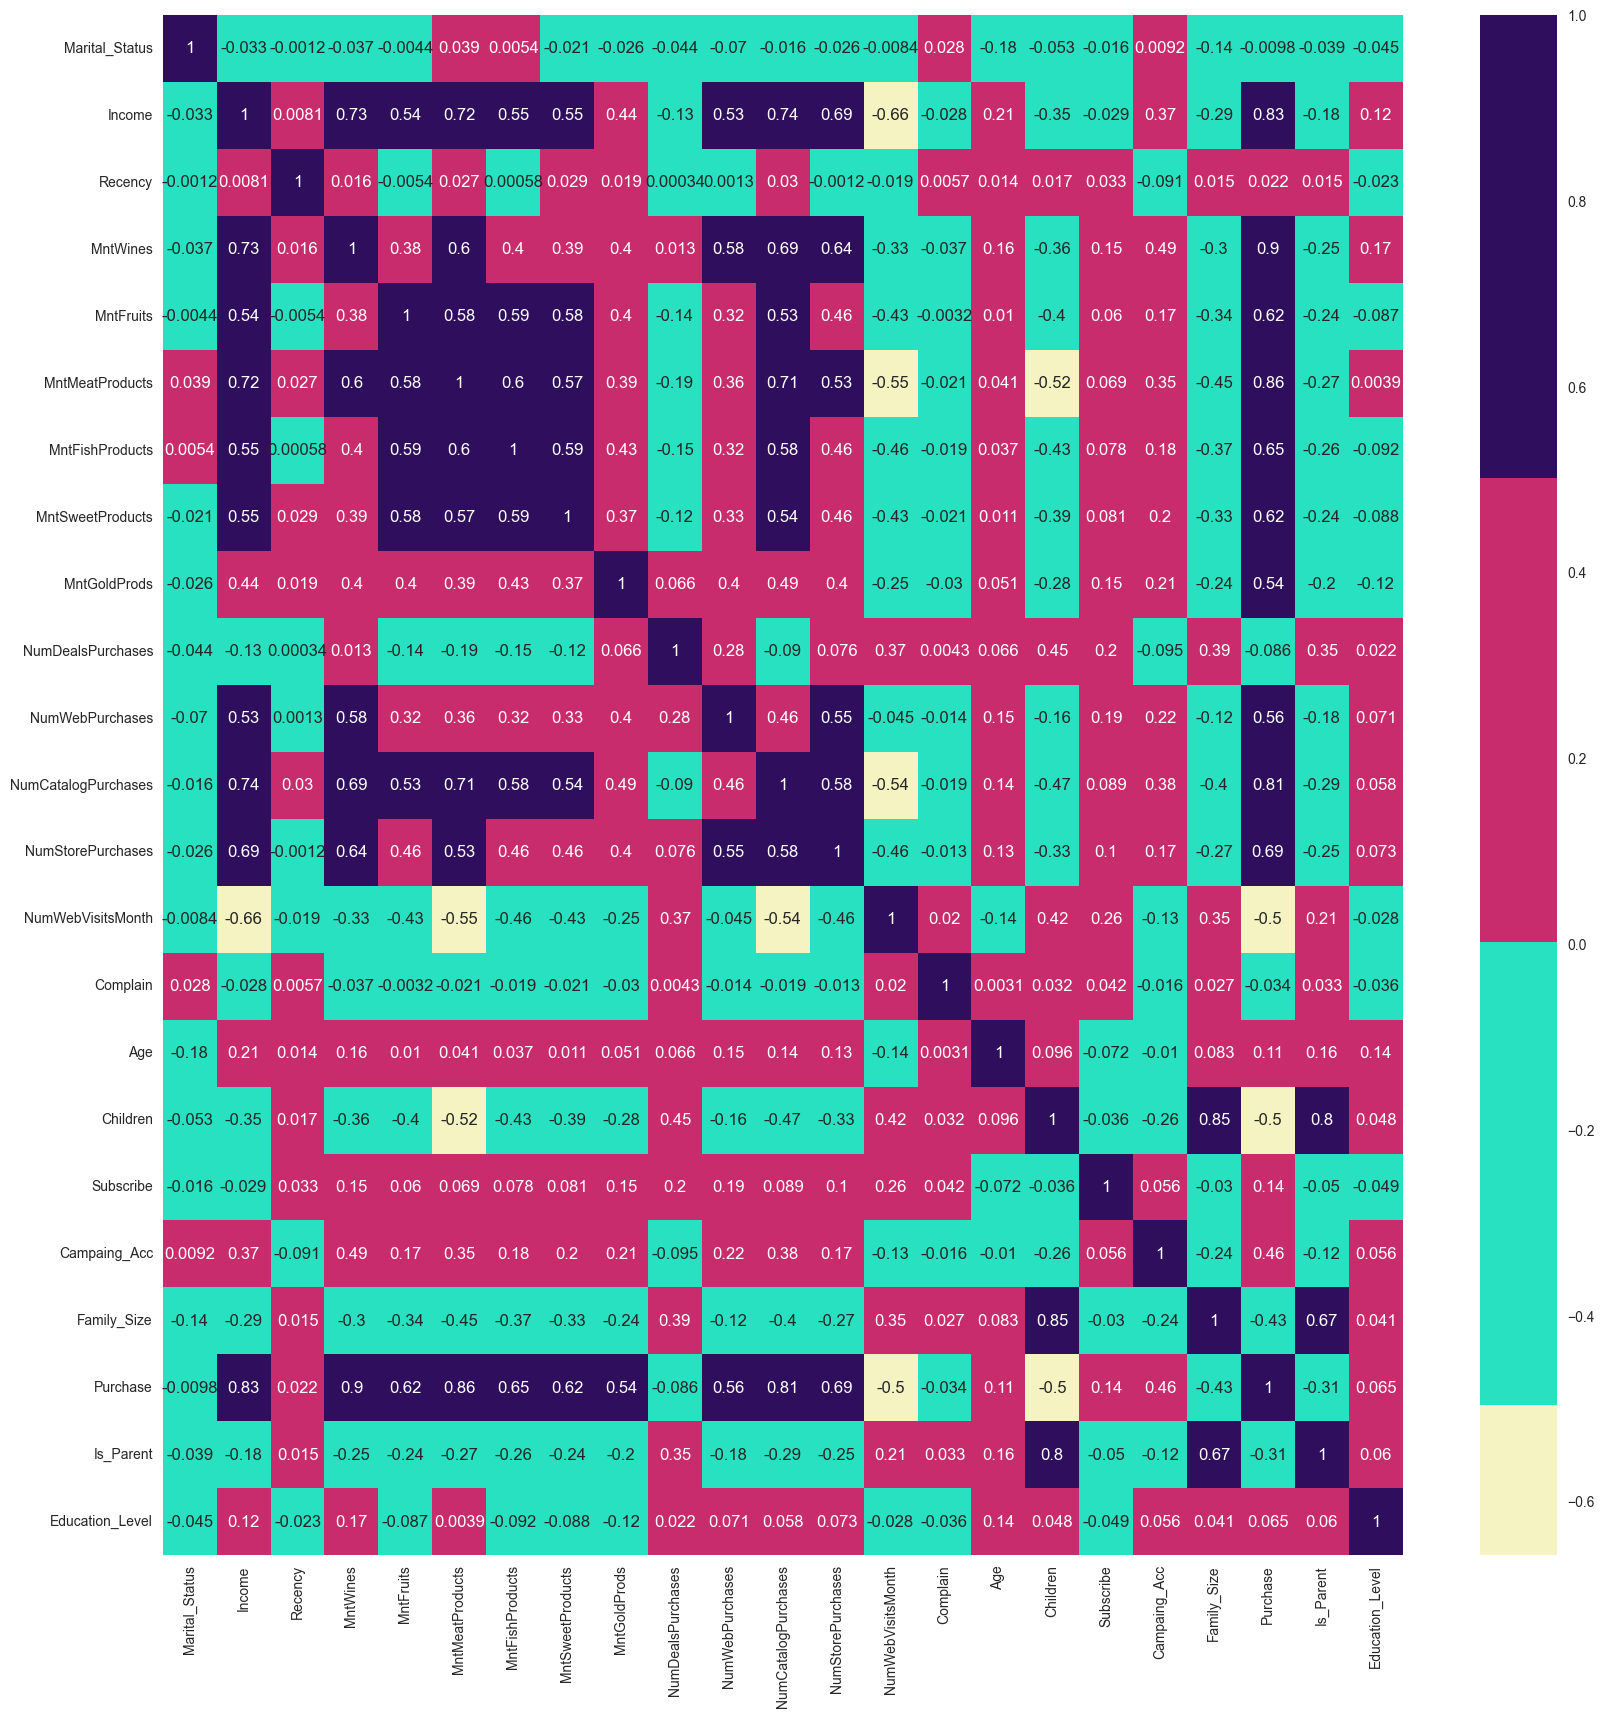

In [258]:
corrmat= df_copy.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, center=0, cmap=cmap)

### Using PCA for Dimension Reduction

In [259]:
pca = PCA(n_components=3)
df_red = pca.fit_transform(df_copy)
df_red = pd.DataFrame(df_red, columns = ['col1', 'col2', 'col3'])

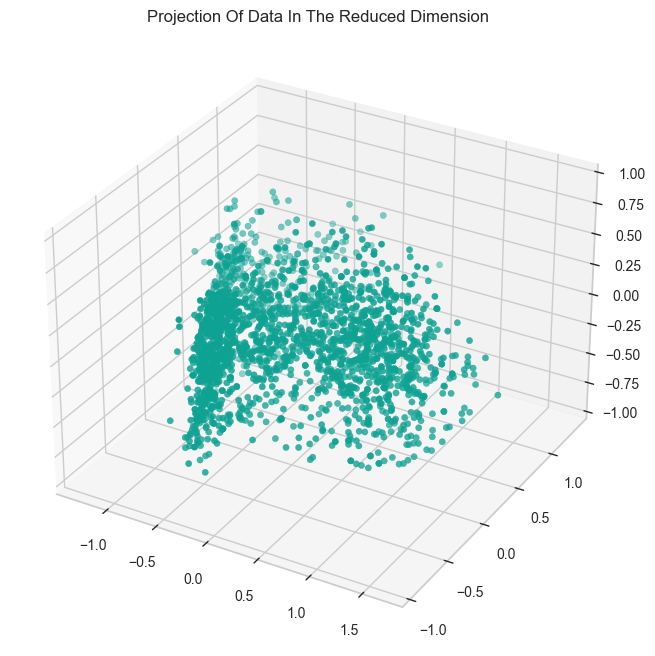

In [260]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_red['col1'],df_red['col2'], df_red['col3'], c="#0EA293", marker="o" )
ax.set_title("Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

### Finding Optimal Cluster Using Elbow Method

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

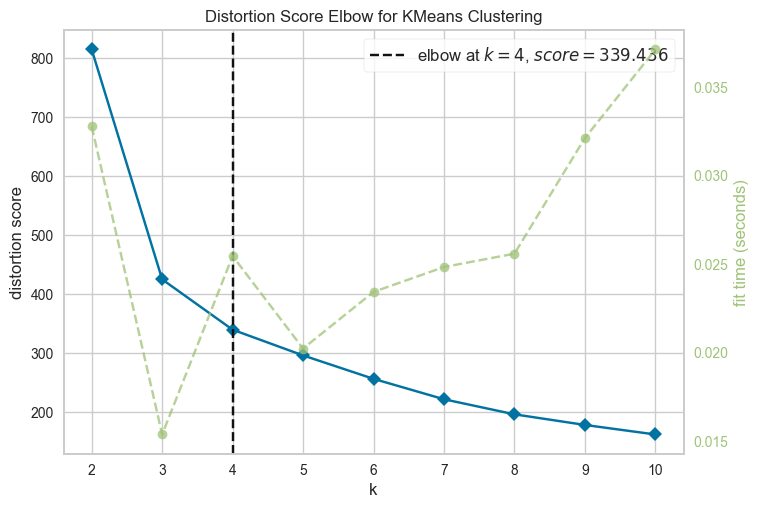

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [261]:
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(df_red)
elbow.show()

### Modelling

In [262]:
model = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_pred = model.fit_predict(df_red)
df["Clusters"] = y_pred + 1

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


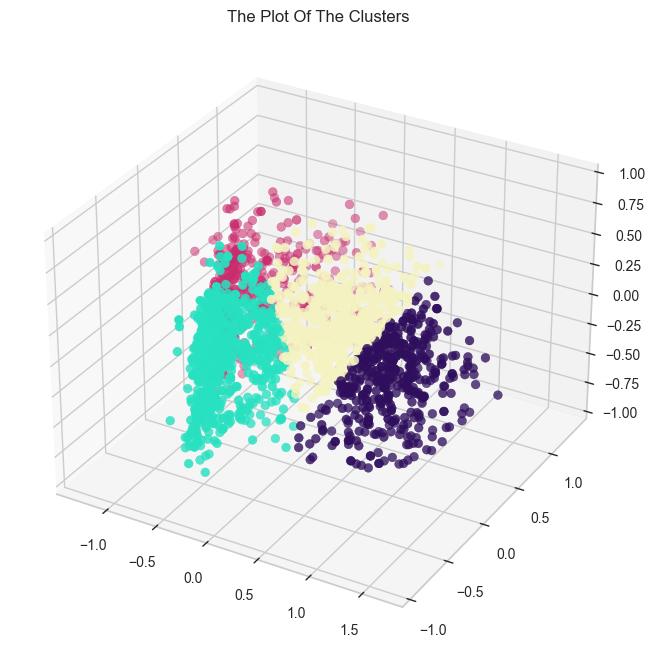

In [263]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
cmap = colors.ListedColormap(["#F5F3C1", "#27E1C1", "#C92C6D", "#2F0F5D"])
ax.scatter(df_red['col1'], df_red['col2'], df_red['col3'], s=40, c=df["Clusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

# Exploring Clusters

### Distribution of Clusters

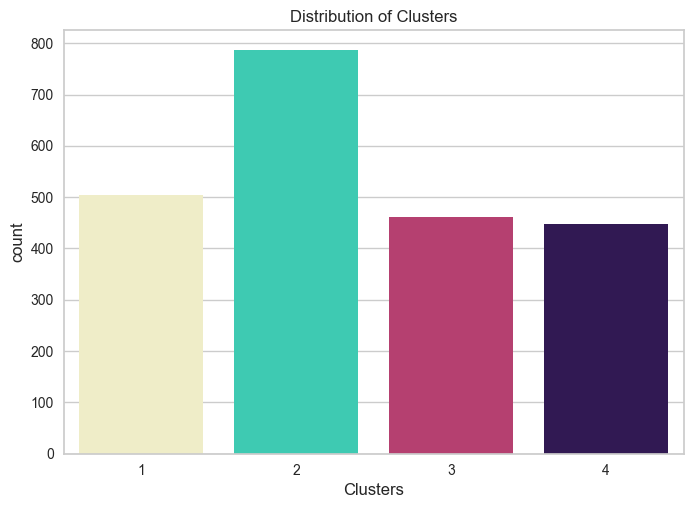

In [264]:
pal = ["#F5F3C1", "#27E1C1", "#C92C6D", "#2F0F5D"]
sns.countplot(x=df["Clusters"], palette = pal)
plt.title('Distribution of Clusters')
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 46.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 74.4% of the points 

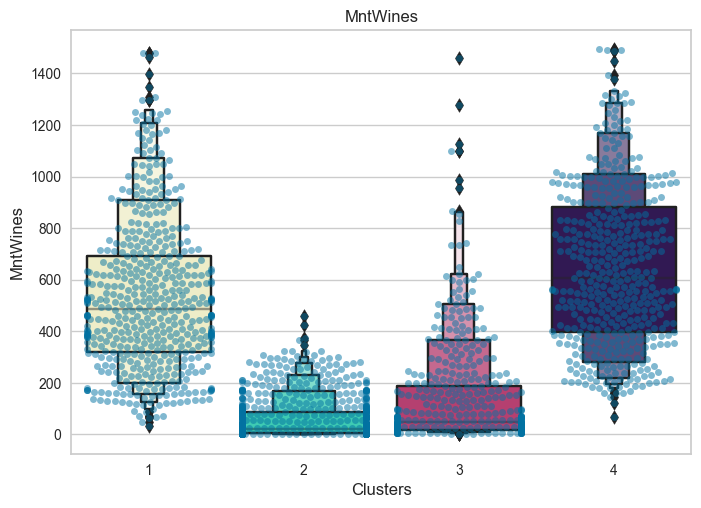

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 78.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 70.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 80.9% of the points

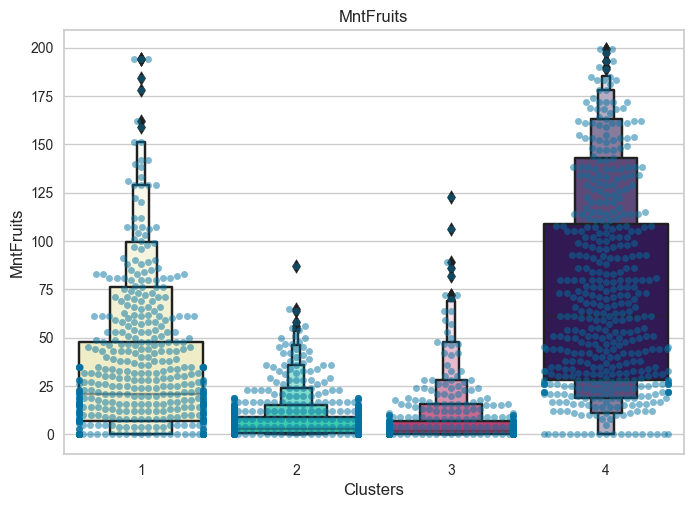

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 81.3% of the points

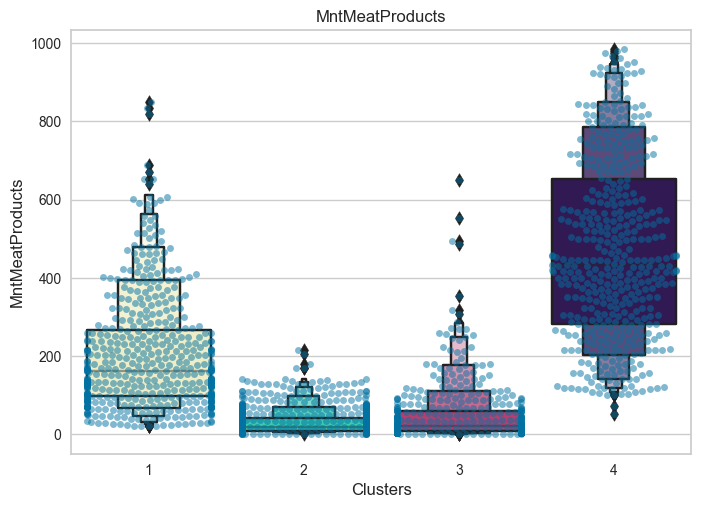

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 77.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 80.2% of the points

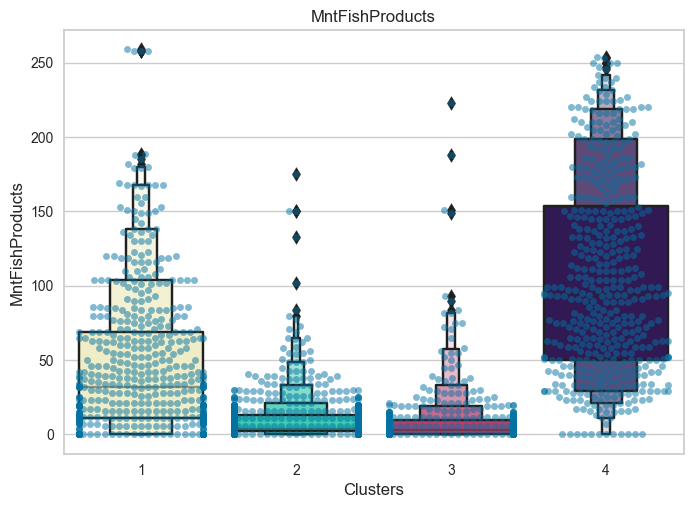

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 81.6% of the points

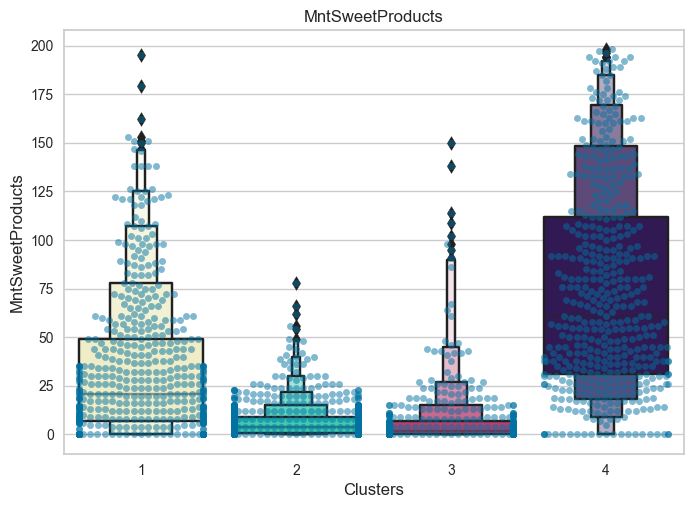

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 24.0% of the points 

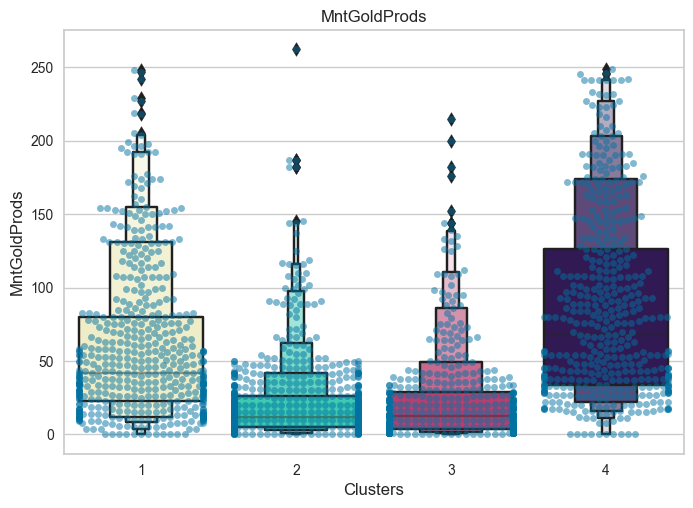

In [265]:
for product in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
    pl=sns.swarmplot(x=df["Clusters"], y=df[product], alpha=0.5 )
    pl=sns.boxenplot(x=df["Clusters"], y=df[product], palette = pal )
    plt.title(product)
    plt.show()

Cluster 1 and cluster 4 are the clusters that purchase the most diverse range of products, including meat, wines, gold, fish, sweet, and gold.

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 22.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 29.9% of the points

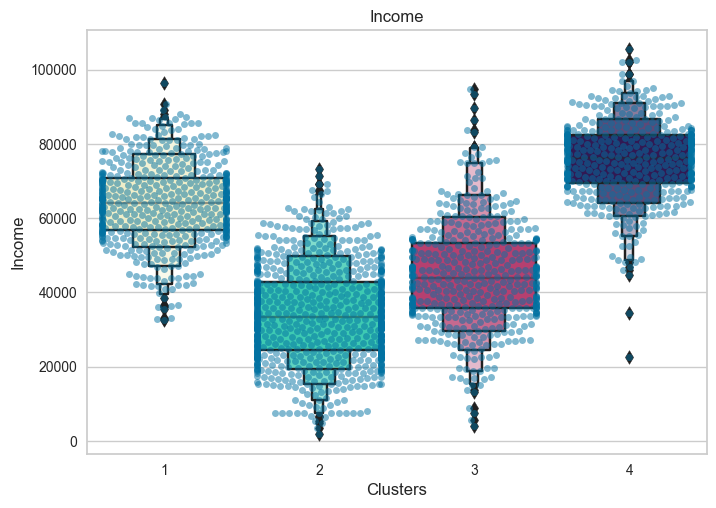

In [266]:
pl=sns.swarmplot(x=df["Clusters"], y=df["Income"], alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Income"], palette = pal)
plt.title('Income')
plt.show()

Cluster 4 has the highest income while cluster 1 has the lowest income

Text(0.5, 1.0, 'Purchase x Income with Clusters Classification')

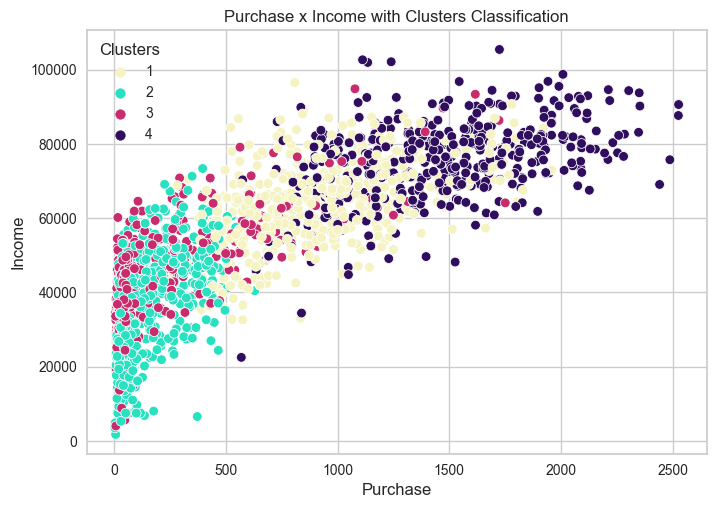

In [267]:
sns.scatterplot(data = df,x=df["Purchase"], y=df["Income"],hue=df["Clusters"], palette = pal)
plt.title('Purchase x Income with Clusters Classification')

Cluster 1 -> High Income and Low Purchase

Cluster 2 -> Low Income and Low Purchase

Cluster 3 -> Low Income and Average Purchase

Cluster 4 -> High Income and High Purchase

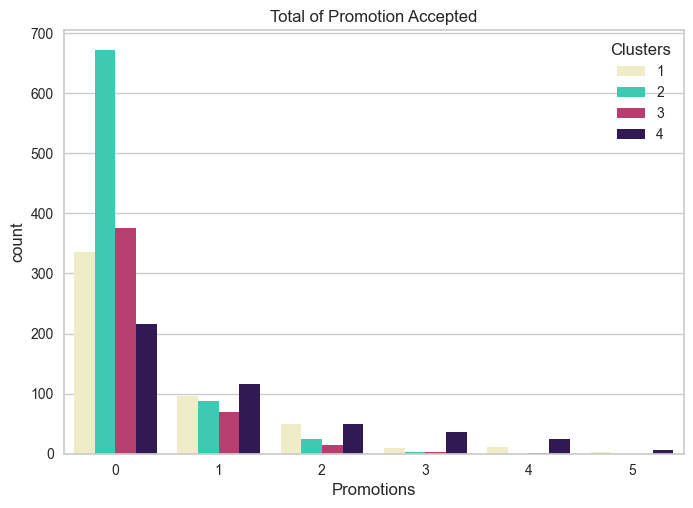

In [268]:
plt.figure()
pl = sns.countplot(x=df["Campaing_Acc"],hue=df["Clusters"], palette= pal)
pl.set_title("Total of Promotion Accepted")
pl.set_xlabel("Promotions")
plt.show()

Majority of cluster 2 and 3 are not inclined to accept the promotions offered.

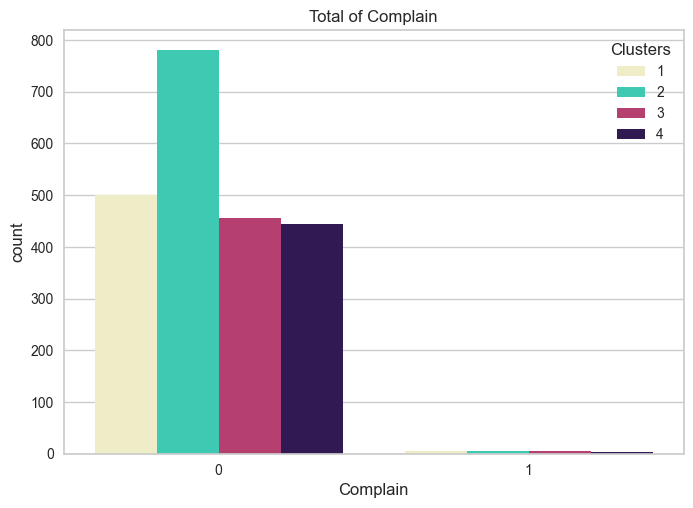

In [269]:
plt.figure()
pl = sns.countplot(x=df["Complain"],hue=df["Clusters"], palette= pal)
pl.set_title("Total of Complain")
pl.set_xlabel("Complain")
plt.show()

Majority of cluster 2 and 3 are often complain for the product

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 83.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 75.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 76.6% of the points

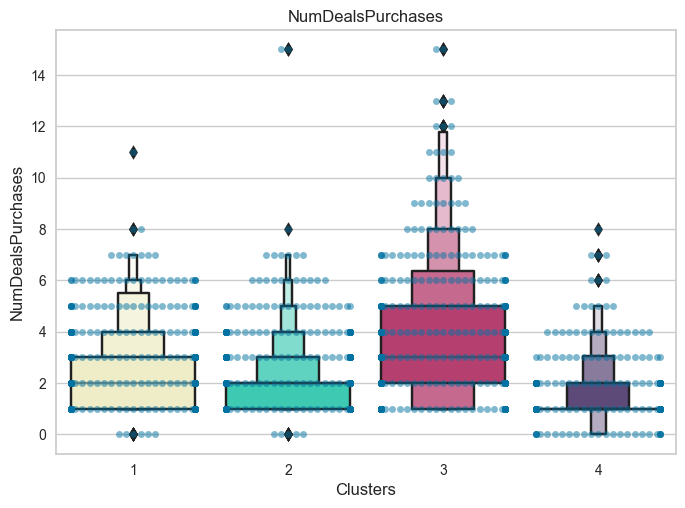

In [270]:
pl=sns.swarmplot(x=df["Clusters"], y=df["NumDealsPurchases"], alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["NumDealsPurchases"], palette = pal)
plt.title('NumDealsPurchases')
plt.show()

Cluster 3 is the most cluster who made a purchases with a discount

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 77.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 59.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 65.9% of the points

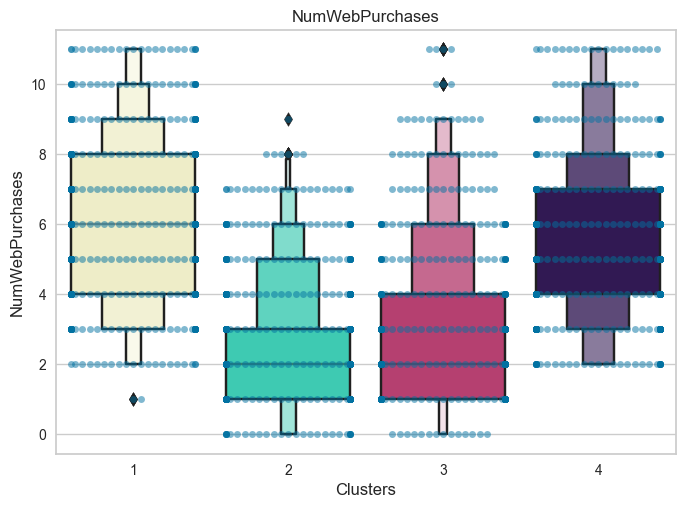

In [271]:
pl=sns.swarmplot(x=df["Clusters"], y=df["NumWebPurchases"], alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["NumWebPurchases"], palette = pal)
plt.title('NumWebPurchases')
plt.show()

Cluster 1 and 4 are the most cluster who purchases using a website

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 62.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 88.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 76.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 67.9% of the points

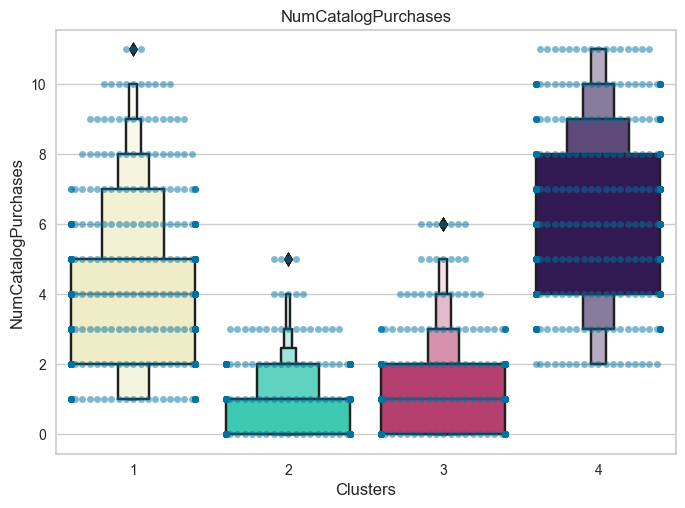

In [272]:
pl=sns.swarmplot(x=df["Clusters"], y=df["NumCatalogPurchases"], alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["NumCatalogPurchases"], palette = pal)
plt.title('NumCatalogPurchases')
plt.show()

Cluster 4 is the most cluster who made purchases using a catalog

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 53.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 64.8% of the points

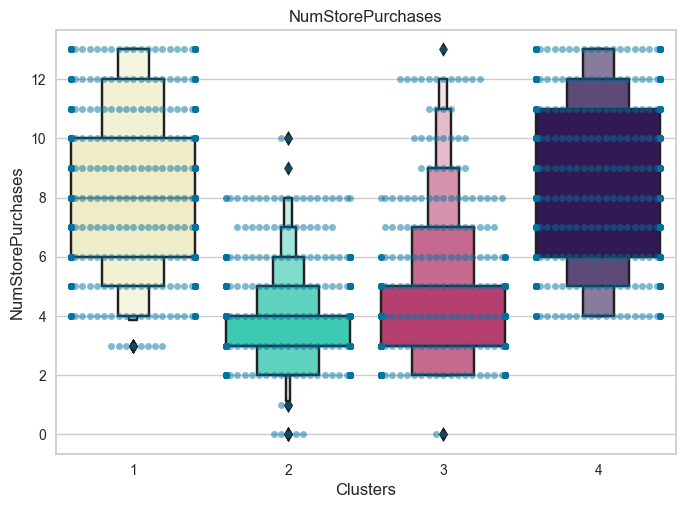

In [273]:
pl=sns.swarmplot(x=df["Clusters"], y=df["NumStorePurchases"], alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["NumStorePurchases"], palette = pal)
plt.title('NumStorePurchases')
plt.show()

Cluster 1 and 4 are the most cluster who purchases directly in stores

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 77.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 70.5% of the points

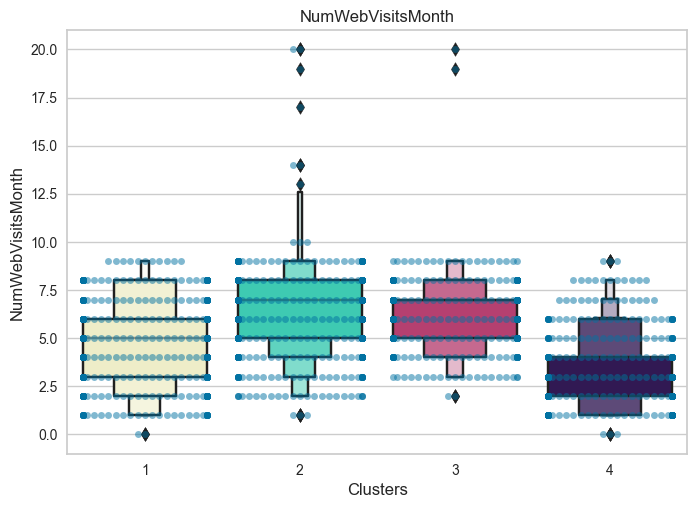

In [274]:
pl=sns.swarmplot(x=df["Clusters"], y=df["NumWebVisitsMonth"], alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["NumWebVisitsMonth"], palette = pal)
plt.title('NumWebVisitsMonth')
plt.show()

Cluster 2 is the most cluster who always visits website in a month

### Profiling

/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 24.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


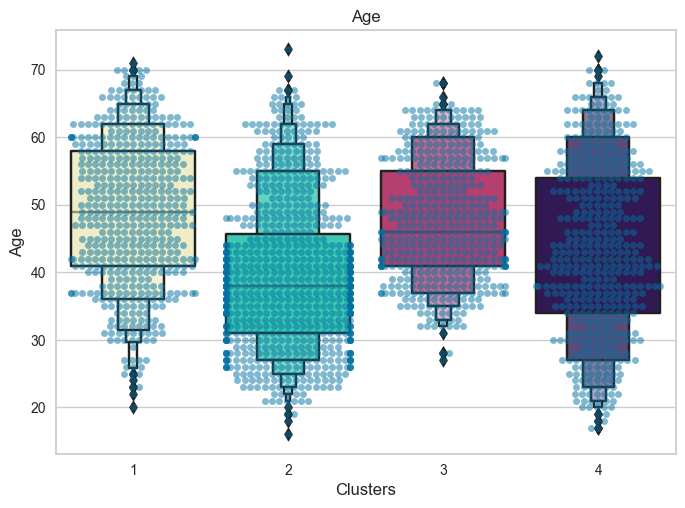

In [277]:
pl=sns.swarmplot(x=df["Clusters"], y=df["Age"], alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Age"], palette = pal)
plt.title('Age')
plt.show()

Text(0.5, 1.0, 'Age x Income with Clusters Classification')

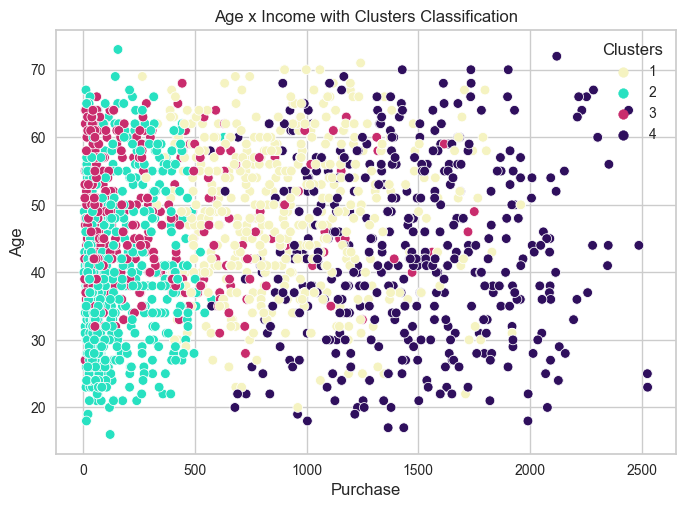

In [289]:
sns.scatterplot(data = df,x=df["Purchase"], y=df["Age"],hue=df["Clusters"], palette = pal)
plt.title('Age x Income with Clusters Classification')

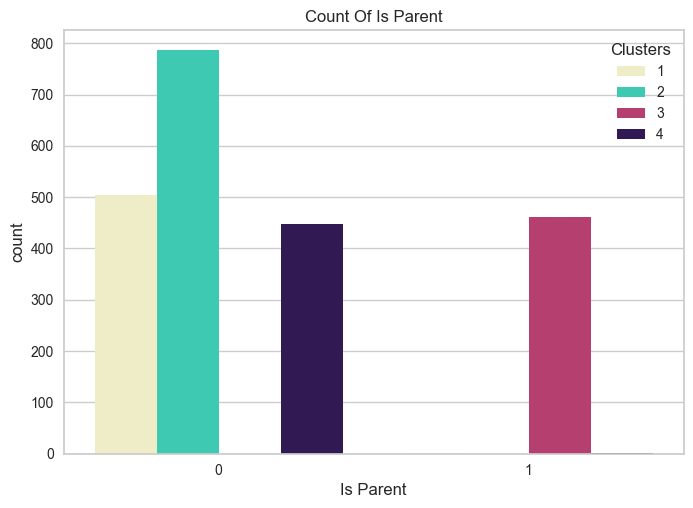

In [312]:
plt.figure()
pl = sns.countplot(x=df["Is_Parent"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Is Parent")
pl.set_xlabel("Is Parent")
plt.show()

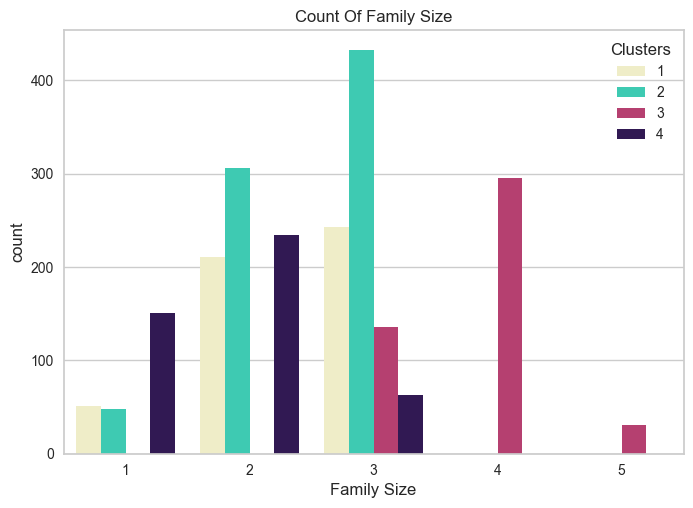

In [313]:
plt.figure()
pl = sns.countplot(x=df["Family_Size"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Family Size")
pl.set_xlabel("Family Size")
plt.show()

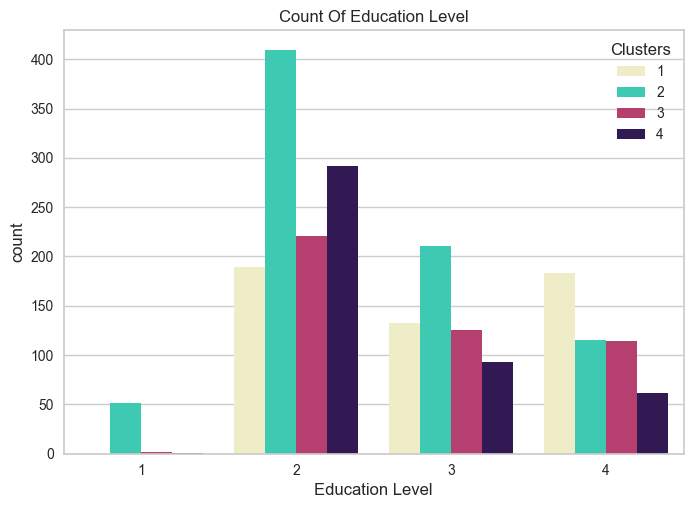

In [314]:
plt.figure()
pl = sns.countplot(x=df["Education_Level"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Education Level")
pl.set_xlabel("Education Level")
plt.show()

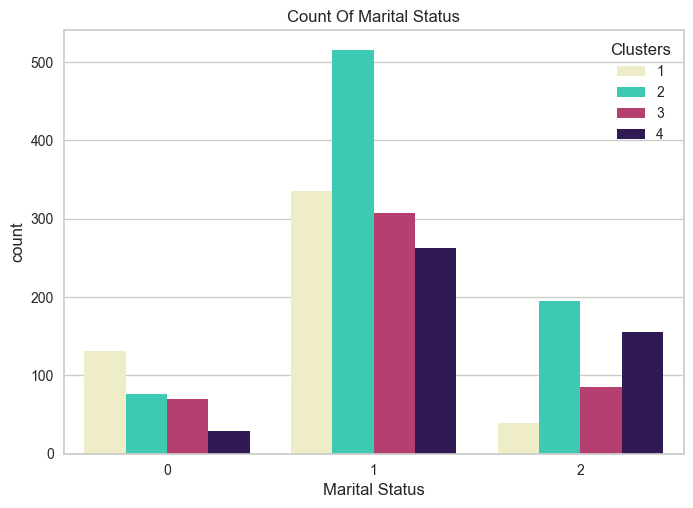

In [315]:
plt.figure()
pl = sns.countplot(x=df["Marital_Status"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Marital Status")
pl.set_xlabel("Marital Status")
plt.show()

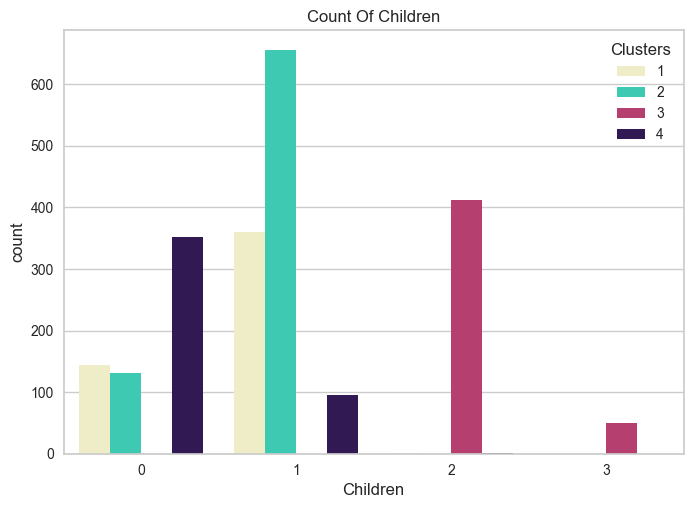

In [316]:
plt.figure()
pl = sns.countplot(x=df["Children"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Children")
pl.set_xlabel("Children")
plt.show()

# Conclusion of Clusters

### Cluster 1
1. Interested in buying a large quantity of products
2. Has an average income level
3. Makes average income and purchase amounts
4. Buys products through websites
5. Buys products directly from physical stores

### Cluster 2
1. Interested in buying a large quantity of products
2. Has an average income level
3. Makes average income and purchase amounts
4. Buys products through websites
5. Buys products directly from physical stores

### Cluster 3
1. Buys products with average purchase amounts
2. Has an average income level
3. Has low income and average purchase amounts
4. Tends to not take advantage of promotions/offers
5. Often buys discounted products
6. Consists of older individuals
7. Has the largest family size among the four clusters

### Cluster 4
1. Interested in buying a large quantity of products
2. Has the highest income level among the four clusters
3. Has high income and high purchase amounts
4. Some individuals in this cluster would take advantage of promotions/offers
5. Buys products through websites
6. Buys products through catalogs
7. Buys products directly from physical stores